In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from utils import *

2021-11-05 07:34:28.848851: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


# Series temporales

In [2]:
# Creo conjuntos de entrenamiento, validación y testeo
n_steps = 50
series = generate_time_series(10000, n_steps+1) # [batches, time_steps]
# Las entradas son los primeros 50 puntos, y el target el ultimo que es el que quiero averiguar

# [batches, tiempo= [0 : 51], canales = 1]
X_train, y_train = series[:7000, 0:n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

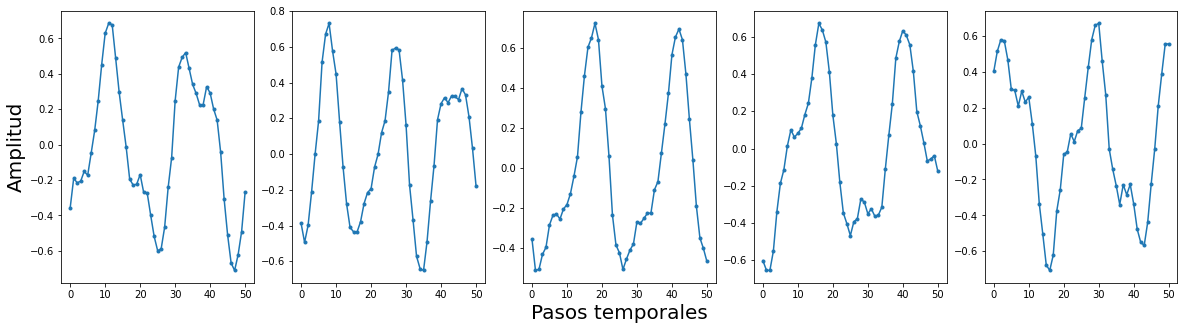

In [3]:
fig, axs = plt.subplots(1,5, figsize=(20,5))
for i in range(5):
    axs[i].plot(series[i,:], '.-')
axs[2].set_xlabel('Pasos temporales', fontsize=20)
axs[0].set_ylabel('Amplitud', fontsize=20)
plt.show()

# Red Neuronal Basica 

In [4]:
fcn_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = [n_steps, 1]),
    tf.keras.layers.Dense(1) #Una sola neurona, equivale a una regresion lineal
    ])
fcn_model.compile(optimizer='Adam', loss='mse')
fcn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


2021-11-05 07:34:36.125642: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-11-05 07:34:36.163806: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-05 07:34:36.164048: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1060 6GB computeCapability: 6.1
coreClock: 1.7715GHz coreCount: 10 deviceMemorySize: 5.93GiB deviceMemoryBandwidth: 178.99GiB/s
2021-11-05 07:34:36.164067: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-11-05 07:34:36.177495: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2021-11-05 07:34:36.177525: I tensorflow/stream_executo

In [5]:
history = fcn_model.fit(x = X_train, y=y_train, validation_data = (X_valid, y_valid), batch_size=32, epochs=20, verbose=1)

2021-11-05 07:34:37.176531: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-05 07:34:37.194381: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3199980000 Hz
2021-11-05 07:34:37.370097: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11


Epoch 1/20
150/219 [===================>..........] - ETA: 0s - loss: 0.0817 

2021-11-05 07:34:37.906442: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


219/219 [==============================] - 1s 1ms/step - loss: 0.0686 - val_loss: 0.0347
Epoch 2/20
219/219 [==============================] - 0s 850us/step - loss: 0.0259 - val_loss: 0.0197
Epoch 3/20
219/219 [==============================] - 0s 804us/step - loss: 0.0164 - val_loss: 0.0139
Epoch 4/20
219/219 [==============================] - 0s 822us/step - loss: 0.0124 - val_loss: 0.0112
Epoch 5/20
219/219 [==============================] - 0s 832us/step - loss: 0.0103 - val_loss: 0.0093
Epoch 6/20
219/219 [==============================] - 0s 816us/step - loss: 0.0088 - val_loss: 0.0081
Epoch 7/20
219/219 [==============================] - 0s 797us/step - loss: 0.0077 - val_loss: 0.0071
Epoch 8/20
219/219 [==============================] - 0s 791us/step - loss: 0.0068 - val_loss: 0.0062
Epoch 9/20
219/219 [==============================] - 0s 772us/step - loss: 0.0061 - val_loss: 0.0056
Epoch 10/20
219/219 [==============================] - 0s 801us/step - loss: 0.0055 - val_loss:

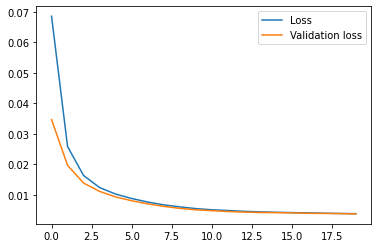

In [7]:
plt.plot(history.epoch, history.history['loss'], label = 'Loss')
plt.plot(history.epoch, history.history['val_loss'], label = 'Validation loss')
plt.legend()

# Red Recurrente Basica

Por defecto, la RNN simple usa una activacion de tangente hiperbolica, puede procesar cualquier largo de secuencia (por eso pongo None en esa dimension) y devuelve solo la ultima salida de la neurona recurrente ( para que devuelva la secuencia tengo que ponerle return_sequences=True)

In [8]:
rnn_model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(1, input_shape=[None, 1])
    ])
rnn_model.compile(optimizer='Adam', loss='mse')
rnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = rnn_model.fit(x = X_train, y=y_train, validation_data = (X_valid, y_valid), batch_size=128, epochs=20, verbose=1)

Epoch 1/20
55/55 [==============================] - 1s 15ms/step - loss: 0.2728 - val_loss: 0.2451
Epoch 2/20
55/55 [==============================] - 1s 13ms/step - loss: 0.2211 - val_loss: 0.1959
Epoch 3/20
55/55 [==============================] - 1s 13ms/step - loss: 0.1765 - val_loss: 0.1562
Epoch 4/20
55/55 [==============================] - 1s 13ms/step - loss: 0.1414 - val_loss: 0.1268
Epoch 5/20
55/55 [==============================] - 1s 13ms/step - loss: 0.1174 - val_loss: 0.1083
Epoch 6/20
55/55 [==============================] - 1s 13ms/step - loss: 0.1029 - val_loss: 0.0973
Epoch 7/20
55/55 [==============================] - 1s 13ms/step - loss: 0.0941 - val_loss: 0.0903
Epoch 8/20
55/55 [==============================] - 1s 13ms/step - loss: 0.0880 - val_loss: 0.0849
Epoch 9/20
55/55 [==============================] - 1s 13ms/step - loss: 0.0828 - val_loss: 0.0800
Epoch 10/20
55/55 [==============================] - 1s 13ms/step - loss: 0.0783 - val_loss: 0.0757
Epoch 11/

# Deep RNN

In [10]:
deeprnn_model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]), 
    tf.keras.layers.SimpleRNN(20, return_sequences=True),
    tf.keras.layers.SimpleRNN(1)
    ])
deeprnn_model.compile(optimizer='Adam', loss='mse')
deeprnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, None, 20)          440       
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 20)          820       
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 1)                 22        
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = deeprnn_model.fit(x = X_train, y=y_train, validation_data = (X_valid, y_valid), batch_size=128, epochs=20, verbose=1)

Epoch 1/20
55/55 [==============================] - 4s 50ms/step - loss: 0.1012 - val_loss: 0.0220
Epoch 2/20
55/55 [==============================] - 3s 46ms/step - loss: 0.0163 - val_loss: 0.0111
Epoch 3/20
55/55 [==============================] - 3s 47ms/step - loss: 0.0095 - val_loss: 0.0084
Epoch 4/20
55/55 [==============================] - 3s 47ms/step - loss: 0.0075 - val_loss: 0.0066
Epoch 5/20
55/55 [==============================] - 3s 47ms/step - loss: 0.0063 - val_loss: 0.0059
Epoch 6/20
55/55 [==============================] - 3s 47ms/step - loss: 0.0056 - val_loss: 0.0055
Epoch 7/20
55/55 [==============================] - 3s 47ms/step - loss: 0.0050 - val_loss: 0.0050
Epoch 8/20
55/55 [==============================] - 3s 47ms/step - loss: 0.0047 - val_loss: 0.0048
Epoch 9/20
55/55 [==============================] - 3s 47ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 10/20
55/55 [==============================] - 3s 46ms/step - loss: 0.0042 - val_loss: 0.0043
Epoch 11/

In [12]:
deeprnn_model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]), 
    tf.keras.layers.SimpleRNN(20),
    tf.keras.layers.Dense(1)
    ])
deeprnn_model.compile(optimizer='Adam', loss='mse')
deeprnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, None, 20)          440       
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 20)                820       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = deeprnn_model.fit(x = X_train, y=y_train, validation_data = (X_valid, y_valid), batch_size=128, epochs=20, verbose=1)

Epoch 1/20
55/55 [==============================] - 2s 32ms/step - loss: 0.0291 - val_loss: 0.0082
Epoch 2/20
55/55 [==============================] - 2s 30ms/step - loss: 0.0062 - val_loss: 0.0051
Epoch 3/20
55/55 [==============================] - 2s 29ms/step - loss: 0.0046 - val_loss: 0.0044
Epoch 4/20
55/55 [==============================] - 2s 29ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 5/20
55/55 [==============================] - 2s 29ms/step - loss: 0.0036 - val_loss: 0.0037
Epoch 6/20
55/55 [==============================] - 2s 28ms/step - loss: 0.0034 - val_loss: 0.0037
Epoch 7/20
55/55 [==============================] - 2s 28ms/step - loss: 0.0033 - val_loss: 0.0036
Epoch 8/20
55/55 [==============================] - 2s 29ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 9/20
55/55 [==============================] - 2s 29ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 10/20
55/55 [==============================] - 2s 29ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 11/

### Prediciendo mas valores futuros
Usar el modelo que predice de a uno

In [16]:
future = 10
series = generate_time_series(1, n_steps + future) #busco predecir 10 valores 

X_new, Y_new = series[:, :n_steps], series[:, n_steps:] # 50 y 10

X = X_new
for step_ahead in range(future):
    y_pred_one = deeprnn_model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)
Y_pred = X[:, n_steps:]

[]

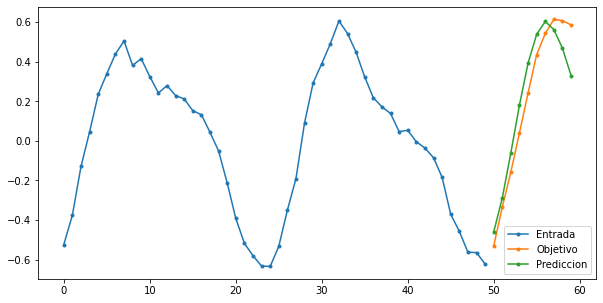

In [17]:
t = np.arange(series.shape[1])
plt.figure(figsize=(10,5))
plt.plot(t[:50],series[0,:][:50], '.-', label = 'Entrada')
plt.plot(t[50:],series[0,:][50:], '.-', label='Objetivo')
plt.plot(t[50:],Y_pred[0,:,0], '.-', label='Prediccion')
plt.legend()
plt.plot()

Armar un modelo que haga predicciones de a 10 (Entreno para que prediga 10 directamente en lugar de 1 solo)

In [18]:
series = generate_time_series(10000, n_steps + 10)
X_train, y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

deeprnn_model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(20),
    tf.keras.layers.Dense(10)
    ])

deeprnn_model.compile(optimizer='Adam', loss='mse')
deeprnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_6 (SimpleRNN)     (None, None, 20)          440       
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 20)                820       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 1,470
Trainable params: 1,470
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = deeprnn_model.fit(x = X_train, y=y_train, validation_data = (X_valid, y_valid), batch_size=128, epochs=20, verbose=1)

Epoch 1/20
55/55 [==============================] - 2s 33ms/step - loss: 0.1264 - val_loss: 0.0750
Epoch 2/20
55/55 [==============================] - 2s 29ms/step - loss: 0.0644 - val_loss: 0.0552
Epoch 3/20
55/55 [==============================] - 2s 29ms/step - loss: 0.0482 - val_loss: 0.0405
Epoch 4/20
55/55 [==============================] - 2s 29ms/step - loss: 0.0377 - val_loss: 0.0346
Epoch 5/20
55/55 [==============================] - 2s 29ms/step - loss: 0.0330 - val_loss: 0.0310
Epoch 6/20
55/55 [==============================] - 2s 30ms/step - loss: 0.0300 - val_loss: 0.0284
Epoch 7/20
55/55 [==============================] - 2s 29ms/step - loss: 0.0264 - val_loss: 0.0245
Epoch 8/20
55/55 [==============================] - 2s 29ms/step - loss: 0.0231 - val_loss: 0.0216
Epoch 9/20
55/55 [==============================] - 2s 29ms/step - loss: 0.0215 - val_loss: 0.0201
Epoch 10/20
55/55 [==============================] - 2s 29ms/step - loss: 0.0188 - val_loss: 0.0188
Epoch 11/

In [21]:
X_new.shape

(1, 50, 1)

[]

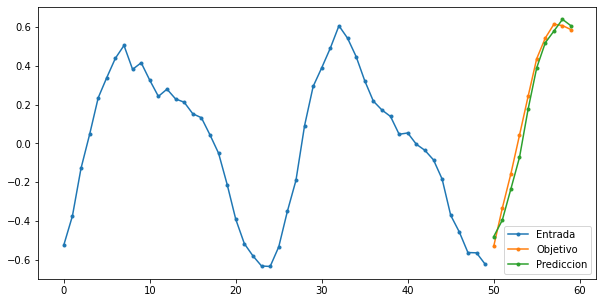

In [22]:
Y_pred = deeprnn_model.predict(X_new)
plt.figure(figsize=(10,5))
plt.plot(t[:50],X_new[0,:,0], '.-', label = 'Entrada')
plt.plot(t[50:],Y_new[0,:], '.-', label='Objetivo')
plt.plot(t[50:],Y_pred[0,:], '.-', label='Prediccion')
plt.legend()
plt.plot()

En lugar de entrenar para que a partir de la serie de 50 prediga los proximos 10, puedo entrenarlo para que para cada input prediga los proximos 10. De esta manera, estaria pasando de un sistema de secuencia-a-vector a un sistema de secuencia-a-secuencia.
Para hacer que el sistema sea secuencia-a-secuencia necesito que las entradas y las salidas tengan la misma dimension, y que la salida este corrida un valor hacia el futuro.
Ademas, cada capa de la red tiene que devolver la secuencia entera de las neuronas, y a la salida de cada capa se tiene que aplicar una capa densa con la cantidad de neuronas equivalente a la salida que pretendemos estimar. Esto se logra con la capa timedistributed

In [23]:
series = generate_time_series(100000, n_steps + 10)
X_train = series[:70000, :n_steps]
X_valid = series[70000:90000, :n_steps]
X_test = series[90000:, :n_steps]


Y = np.empty((100000, n_steps, 10)) # Cada target es una secuencia de 10

for step_ahead in range(1, 10 + 1):
    Y[:, :, step_ahead - 1] = series[:, step_ahead:step_ahead + n_steps, 0]

Y_train = Y[:70000]
Y_valid = Y[70000:90000]
Y_test = Y[90000:]

In [24]:
series.shape

(100000, 60, 1)

In [25]:
X_train.shape, Y_train.shape

((70000, 50, 1), (70000, 50, 10))

In [26]:
sas_model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(20, return_sequences=True),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(10))
    ])

Defino una metrica porque me interesa solamente el error presente en el ultimo timestep para la evaluacion. Para el entrenamiento, si me sirve el error en todos los timesteps. 

In [27]:
def last_time_step_mse(Y_true, Y_pred):
    return tf.keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
sas_model.compile(loss="mse", optimizer=optimizer, metrics=[last_time_step_mse])

In [28]:
history = sas_model.fit(x = X_train, y=Y_train, validation_data = (X_valid, Y_valid), batch_size=256, epochs=20, verbose=1)

2021-11-05 07:39:48.081785: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 140000000 exceeds 10% of free system memory.


Epoch 1/20
273/274 [============================>.] - ETA: 0s - loss: 0.0425 - last_time_step_mse: 0.0292

2021-11-05 07:39:56.529617: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 40000000 exceeds 10% of free system memory.


274/274 [==============================] - 9s 32ms/step - loss: 0.0424 - last_time_step_mse: 0.0292 - val_loss: 0.0355 - val_last_time_step_mse: 0.0205
Epoch 2/20
274/274 [==============================] - 8s 30ms/step - loss: 0.0294 - last_time_step_mse: 0.0156 - val_loss: 0.0269 - val_last_time_step_mse: 0.0131
Epoch 3/20
274/274 [==============================] - 8s 30ms/step - loss: 0.0256 - last_time_step_mse: 0.0127 - val_loss: 0.0255 - val_last_time_step_mse: 0.0127
Epoch 4/20
274/274 [==============================] - 8s 30ms/step - loss: 0.0238 - last_time_step_mse: 0.0111 - val_loss: 0.0225 - val_last_time_step_mse: 0.0091
Epoch 5/20
274/274 [==============================] - 8s 30ms/step - loss: 0.0217 - last_time_step_mse: 0.0086 - val_loss: 0.0200 - val_last_time_step_mse: 0.0069
Epoch 6/20
274/274 [==============================] - 8s 30ms/step - loss: 0.0196 - last_time_step_mse: 0.0067 - val_loss: 0.0189 - val_last_time_step_mse: 0.0062
Epoch 7/20
274/274 [=============

In [33]:
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = sas_model.predict(X_new)[:, -1][..., np.newaxis]


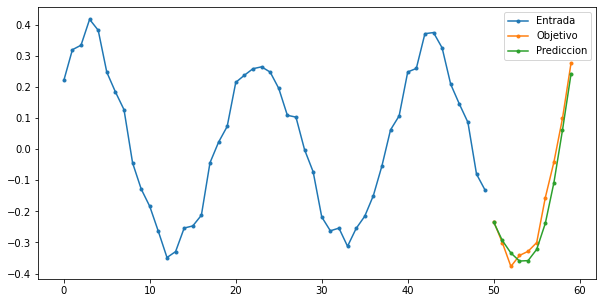

In [34]:
t = np.arange(series.shape[1])
plt.figure(figsize=(10,5))
plt.plot(t[:50],X_new[0,:,0], '.-', label = 'Entrada')
plt.plot(t[50:],Y_new[0,:,0], '.-', label='Objetivo')
plt.plot(t[50:],Y_pred[0,:,0], '.-', label='Prediccion')
plt.legend()


# Normalización de capa

In [71]:
model = tf.keras.models.Sequential([
    tf.keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True,input_shape=[None, 1]),
    tf.keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(10))
    ])
model.compile(loss="mse", optimizer=optimizer, metrics=[last_time_step_mse])

In [72]:
history = model.fit(x = X_train, y=Y_train, validation_data = (X_valid, Y_valid), batch_size=512, epochs=20, verbose=1)

Epoch 1/20
137/137 [==============================] - 12s 77ms/step - loss: 0.0661 - last_time_step_mse: 0.0572 - val_loss: 0.0460 - val_last_time_step_mse: 0.0352
Epoch 2/20
137/137 [==============================] - 10s 75ms/step - loss: 0.0410 - last_time_step_mse: 0.0301 - val_loss: 0.0353 - val_last_time_step_mse: 0.0231
Epoch 3/20
137/137 [==============================] - 10s 73ms/step - loss: 0.0339 - last_time_step_mse: 0.0221 - val_loss: 0.0308 - val_last_time_step_mse: 0.0194
Epoch 4/20
137/137 [==============================] - 10s 74ms/step - loss: 0.0294 - last_time_step_mse: 0.0180 - val_loss: 0.0279 - val_last_time_step_mse: 0.0161
Epoch 5/20
137/137 [==============================] - 10s 74ms/step - loss: 0.0271 - last_time_step_mse: 0.0160 - val_loss: 0.0266 - val_last_time_step_mse: 0.0153
Epoch 6/20
137/137 [==============================] - 10s 74ms/step - loss: 0.0254 - last_time_step_mse: 0.0142 - val_loss: 0.0249 - val_last_time_step_mse: 0.0137
Epoch 7/20
137/1

In [73]:
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.LSTM(20, return_sequences=True),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(10))
    ])
lstm_model.compile(loss="mse", optimizer=optimizer, metrics=[last_time_step_mse])

In [74]:
history = lstm_model.fit(x = X_train, y=Y_train, validation_data = (X_valid, Y_valid), batch_size=512, epochs=20, verbose=1)

Epoch 1/20
137/137 [==============================] - 3s 13ms/step - loss: 0.0546 - last_time_step_mse: 0.0472 - val_loss: 0.0295 - val_last_time_step_mse: 0.0160
Epoch 2/20
137/137 [==============================] - 1s 10ms/step - loss: 0.0271 - last_time_step_mse: 0.0138 - val_loss: 0.0258 - val_last_time_step_mse: 0.0128
Epoch 3/20
137/137 [==============================] - 1s 10ms/step - loss: 0.0242 - last_time_step_mse: 0.0111 - val_loss: 0.0230 - val_last_time_step_mse: 0.0096
Epoch 4/20
137/137 [==============================] - 1s 10ms/step - loss: 0.0207 - last_time_step_mse: 0.0070 - val_loss: 0.0191 - val_last_time_step_mse: 0.0054
Epoch 5/20
137/137 [==============================] - 1s 10ms/step - loss: 0.0184 - last_time_step_mse: 0.0049 - val_loss: 0.0176 - val_last_time_step_mse: 0.0044
Epoch 6/20
137/137 [==============================] - 1s 10ms/step - loss: 0.0173 - last_time_step_mse: 0.0043 - val_loss: 0.0170 - val_last_time_step_mse: 0.0043
Epoch 7/20
137/137 [==

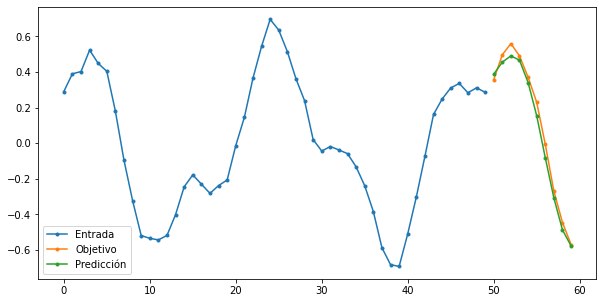

In [81]:
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = lstm_model.predict(X_new)[:, -1][..., np.newaxis]

t = np.arange(series.shape[1])
plt.figure(figsize=(10,5))
plt.plot(t[:50],X_new[0,:,0], '.-', label = 'Entrada')
plt.plot(t[50:],Y_new[0,:,0], '.-', label='Objetivo')
plt.plot(t[50:],Y_pred[0,:,0], '.-', label='Predicción')
plt.legend()

# 1D Conv

In [55]:
Y_train[:, 3::2].shape

(70000, 24, 10)

In [61]:
X_train.shape

(70000, 50, 1)

In [50]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=20, kernel_size=4, strides=2, padding="valid", input_shape=[None, 1]),
    tf.keras.layers.GRU(20, return_sequences=True),
    tf.keras.layers.GRU(20, return_sequences=True),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(10))
    ])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train[:, 3::2], epochs=20, validation_data=(X_valid, Y_valid[:, 3::2]))

Epoch 1/20


2021-11-05 08:33:53.856008: E tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2021-11-05 08:33:53.856029: W tensorflow/stream_executor/gpu/asm_compiler.cc:56] Couldn't invoke ptxas --version
2021-11-05 08:33:53.856451: E tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2021-11-05 08:33:53.856503: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


2188/2188 [==============================] - 16s 6ms/step - loss: 0.0300 - last_time_step_mse: 0.0203 - val_loss: 0.0205 - val_last_time_step_mse: 0.0100
Epoch 2/20
2188/2188 [==============================] - 16s 7ms/step - loss: 0.0195 - last_time_step_mse: 0.0093 - val_loss: 0.0186 - val_last_time_step_mse: 0.0087
Epoch 3/20
2188/2188 [==============================] - 16s 7ms/step - loss: 0.0167 - last_time_step_mse: 0.0069 - val_loss: 0.0143 - val_last_time_step_mse: 0.0046
Epoch 4/20
2188/2188 [==============================] - 15s 7ms/step - loss: 0.0136 - last_time_step_mse: 0.0042 - val_loss: 0.0127 - val_last_time_step_mse: 0.0038
Epoch 5/20
2188/2188 [==============================] - 11s 5ms/step - loss: 0.0124 - last_time_step_mse: 0.0036 - val_loss: 0.0119 - val_last_time_step_mse: 0.0034
Epoch 6/20
2188/2188 [==============================] - 7s 3ms/step - loss: 0.0117 - last_time_step_mse: 0.0034 - val_loss: 0.0113 - val_last_time_step_mse: 0.0031
Epoch 7/20
2188/2188 [

In [54]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 20)          100       
_________________________________________________________________
gru (GRU)                    (None, None, 20)          2520      
_________________________________________________________________
gru_1 (GRU)                  (None, None, 20)          2520      
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 10)          210       
Total params: 5,350
Trainable params: 5,350
Non-trainable params: 0
_________________________________________________________________


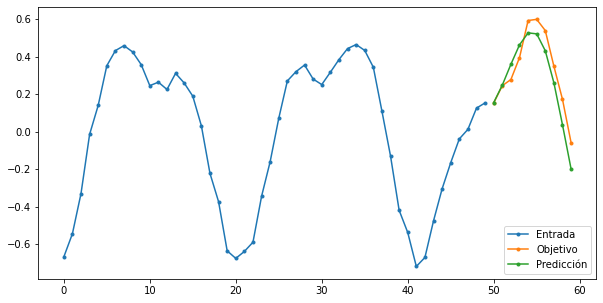

In [60]:
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

t = np.arange(series.shape[1])
plt.figure(figsize=(10,5))
plt.plot(t[:50],X_new[0,:,0], '.-', label = 'Entrada')
plt.plot(t[50:],Y_new[0,:,0], '.-', label='Objetivo')
plt.plot(t[50:],Y_pred[0,:,0], '.-', label='Predicción')
plt.legend()

# WaveNet 

In [62]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[None, 1]))
for rate in (1, 2, 4, 8) * 2:
    model.add(tf.keras.layers.Conv1D(filters=20, kernel_size=2, padding="causal", activation="relu", dilation_rate=rate))

model.add(tf.keras.layers.Conv1D(filters=10, kernel_size=1))
model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])

In [63]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, None, 20)          60        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 20)          820       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 20)          820       
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 20)          820       
_________________________________________________________________
conv1d_5 (Conv1D)            (None, None, 20)          820       
_________________________________________________________________
conv1d_6 (Conv1D)            (None, None, 20)          820       
_________________________________________________________________
conv1d_7 (Conv1D)            (None, None, 20)         

In [66]:
history = model.fit(X_train, Y_train, epochs=20, batch_size=128, validation_data=(X_valid, Y_valid))

Epoch 1/20
547/547 [==============================] - 5s 8ms/step - loss: 0.0234 - last_time_step_mse: 0.0112 - val_loss: 0.0230 - val_last_time_step_mse: 0.0110
Epoch 2/20
547/547 [==============================] - 6s 10ms/step - loss: 0.0224 - last_time_step_mse: 0.0102 - val_loss: 0.0217 - val_last_time_step_mse: 0.0096
Epoch 3/20
547/547 [==============================] - 6s 11ms/step - loss: 0.0215 - last_time_step_mse: 0.0095 - val_loss: 0.0208 - val_last_time_step_mse: 0.0088
Epoch 4/20
547/547 [==============================] - 7s 12ms/step - loss: 0.0207 - last_time_step_mse: 0.0087 - val_loss: 0.0201 - val_last_time_step_mse: 0.0082
Epoch 5/20
547/547 [==============================] - 6s 11ms/step - loss: 0.0199 - last_time_step_mse: 0.0081 - val_loss: 0.0195 - val_last_time_step_mse: 0.0075
Epoch 6/20
547/547 [==============================] - 6s 12ms/step - loss: 0.0191 - last_time_step_mse: 0.0072 - val_loss: 0.0187 - val_last_time_step_mse: 0.0070
Epoch 7/20
547/547 [===

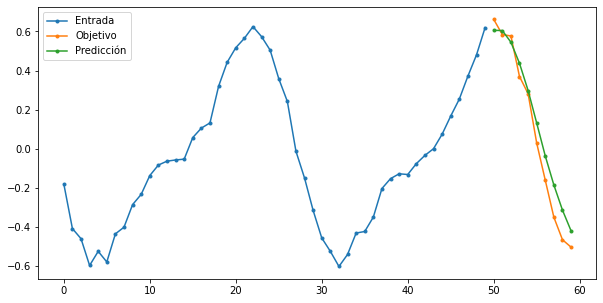

In [70]:
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

t = np.arange(series.shape[1])
plt.figure(figsize=(10,5))
plt.plot(t[:50],X_new[0,:,0], '.-', label = 'Entrada')
plt.plot(t[50:],Y_new[0,:,0], '.-', label='Objetivo')
plt.plot(t[50:],Y_pred[0,:,0], '.-', label='Predicción')
plt.legend()